# Diffusion in a 2D domain with Traps

Cem Berke Arslan

Date: 14/11/2024

## Aim of the Project:

Investigate of a diffusion of a particle in a 2D domain with traps. Explore how the mean square displacement (MSD) of the particle changes over time as a function of trap density and the trapping time parameter λ (lambda), which represents the average trapping time relative to the characteristic time of free diffusion.

### Simulation Parameters

### Trap Generation

### Diffusion Simulation

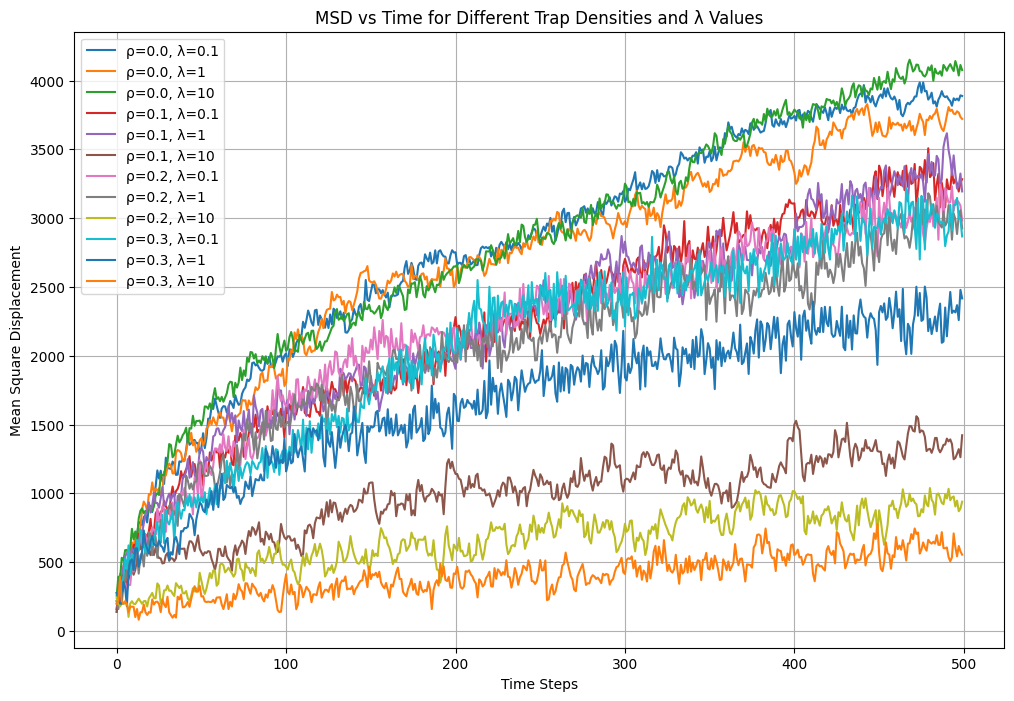

In [16]:
# Plotting MSD vs Time for different trap densities and λ values

plt.figure(figsize=(12, 8))
for rho in rho_list:
    for λ in lambda_list:
        key = f"rho_{rho}_lambda_{λ}"
        msd = results[key]['msd']
        plt.plot(range(T_steps), msd, label=f'ρ={rho}, λ={λ}')

plt.xlabel('Time Steps')
plt.ylabel('Mean Square Displacement')
plt.title('MSD vs Time for Different Trap Densities and λ Values')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 100  # Lattice size
N_particles = 1000  # Fixed number of particles
num_steps = 500  # Number of time steps
trap_size = 3  # Trap radius
delta_t = 1.0  # Time step size

In [18]:
# Trap configurations
trap_depths = [0, 10, 20]  # No traps, deep traps, deeper traps
N_traps = 10  # Few traps randomly placed

In [19]:
# Initialize traps
def initialize_traps(L, N_traps, trap_size):
    traps = []
    for _ in range(N_traps):
        while True:
            trap_center = np.random.randint(0, L, size=2)
            if all(np.linalg.norm(np.array(trap_center) - np.array(t)) > 2 * trap_size for t in traps):
                traps.append(trap_center)
                break
    return np.array(traps)

In [20]:
# Initialize particles
def initialize_particles(N_particles, L, traps, trap_size):
    positions = np.zeros((N_particles, 2), dtype=int)
    for i in range(N_particles):
        while True:
            pos = np.random.randint(0, L, size=2)
            if not any(np.linalg.norm(pos - trap) <= trap_size for trap in traps):
                positions[i] = pos
                break
    return positions

In [21]:
# Check if a particle is in a trap
def is_in_trap(position, traps, trap_size):
    for trap in traps:
        if np.linalg.norm(position - trap) <= trap_size:
            return True
    return False

In [22]:
# Simulate diffusion
def simulate_diffusion(L, N_particles, traps, trap_size, trap_depth, num_steps):
    positions = initialize_particles(N_particles, L, traps, trap_size)
    trapping_times = np.zeros(N_particles)
    msd = np.zeros(num_steps)
    survival_prob = np.zeros(num_steps)
    trap_density = np.zeros(num_steps)

    for t in range(num_steps):
        free_particles = 0
        for i in range(N_particles):
            if trapping_times[i] > 0:
                trapping_times[i] -= delta_t
                continue

            move = np.random.choice(['up', 'down', 'left', 'right'])
            if move == 'up':
                positions[i][0] = (positions[i][0] + 1) % L
            elif move == 'down':
                positions[i][0] = (positions[i][0] - 1) % L
            elif move == 'right':
                positions[i][1] = (positions[i][1] + 1) % L
            elif move == 'left':
                positions[i][1] = (positions[i][1] - 1) % L

            if is_in_trap(positions[i], traps, trap_size):
                trapping_times[i] = trap_depth
            else:
                free_particles += 1

        msd[t] = np.mean(positions[:, 0]**2 + positions[:, 1]**2)
        survival_prob[t] = free_particles / N_particles
        trap_density[t] = np.sum(trapping_times > 0) / N_particles

    return msd, survival_prob, np.mean(trap_density)

In [23]:
# Main loop for different trap depths
msd_results = {}
survival_results = {}
trap_densities = []

traps = initialize_traps(L, N_traps, trap_size)

for depth in trap_depths:
    msd, survival_prob, avg_trap_density = simulate_diffusion(
        L, N_particles, traps, trap_size, depth, num_steps
    )
    msd_results[depth] = msd
    survival_results[depth] = survival_prob
    trap_densities.append(avg_trap_density)

KeyboardInterrupt: 

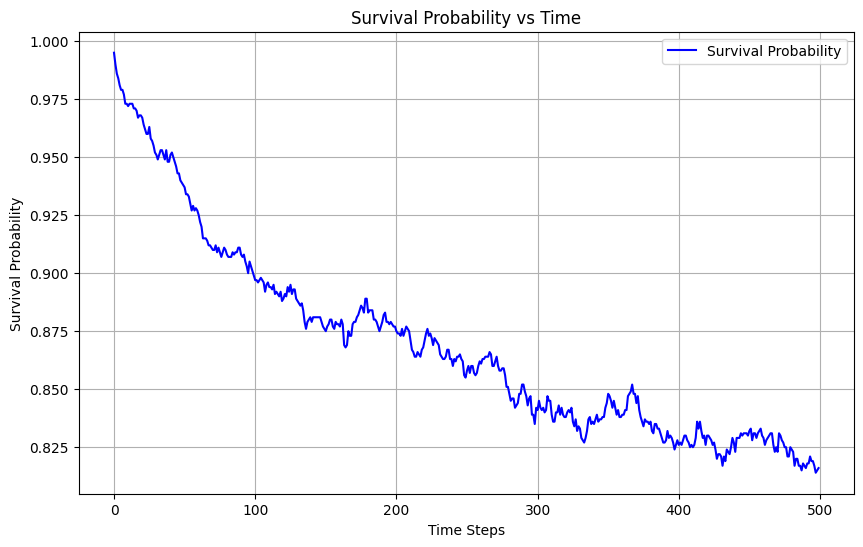

In [ ]:
# MSD vs Time Plot
plt.figure(figsize=(10, 6))
for depth, msd in msd_results.items():
    label = f"Trap Depth = {depth}" if depth > 0 else "No Traps"
    plt.plot(msd, label=label)
plt.title("MSD vs Time Steps")
plt.xlabel("Time Steps")
plt.ylabel("Mean Square Displacement")
plt.legend()
plt.grid(True)
plt.show()

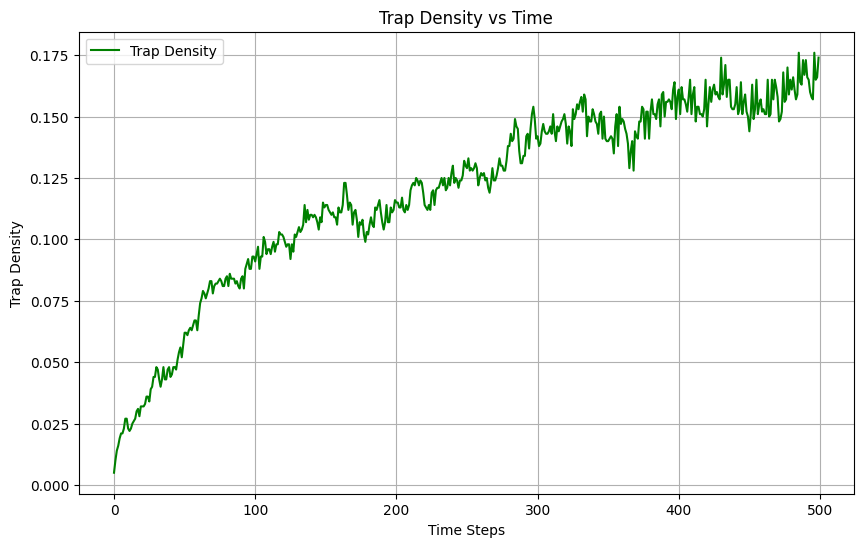

In [ ]:
# Survival Probability vs Time Plot
plt.figure(figsize=(10, 6))
for depth, survival_prob in survival_results.items():
    label = f"Trap Depth = {depth}" if depth > 0 else "No Traps"
    plt.plot(survival_prob, label=label)
plt.title("Survival Probability vs Time")
plt.xlabel("Time Steps")
plt.ylabel("Survival Probability")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Trap Depth vs Average Trap Density (Bar Chart)
plt.figure(figsize=(10, 6))
plt.bar([f"Depth {d}" for d in trap_depths], trap_densities, color=['blue', 'orange', 'green'])
plt.title("Trap Depth vs Average Trap Density")
plt.xlabel("Trap Depth")
plt.ylabel("Average Trap Density")
plt.grid(True)
plt.show()

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(trap_depths, avg_densities, marker='o', label="Average Trap Density")
plt.title("Trap Depth vs Average Trap Density")
plt.xlabel("Trap Depth")
plt.ylabel("Average Trap Density")
plt.grid(True)
plt.legend()
plt.show()

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 100  # Lattice size
N_particles = 1000  # Fixed number of particles
num_steps = 500  # Number of time steps
trap_size = 3  # Trap radius
delta_t = 1.0  # Time step size

# Trap configurations
trap_depths = [0, 10, 20, 30]  # No traps, deep traps, deeper traps, deepest traps
N_traps = 10  # Few traps randomly placed

# Initialize traps
def initialize_traps(L, N_traps, trap_size):
    traps = []
    for _ in range(N_traps):
        while True:
            trap_center = np.random.randint(0, L, size=2)
            if all(np.linalg.norm(np.array(trap_center) - np.array(t)) > 2 * trap_size for t in traps):
                traps.append(trap_center)
                break
    return np.array(traps)

# Initialize particles
def initialize_particles(N_particles, L, traps, trap_size):
    positions = np.zeros((N_particles, 2), dtype=int)
    for i in range(N_particles):
        while True:
            pos = np.random.randint(0, L, size=2)
            if not any(np.linalg.norm(pos - trap) <= trap_size for trap in traps):
                positions[i] = pos
                break
    return positions

# Check if a particle is in a trap
def is_in_trap(position, traps, trap_size):
    for trap in traps:
        if np.linalg.norm(position - trap) <= trap_size:
            return True
    return False

# Simulate diffusion
def simulate_diffusion(L, N_particles, traps, trap_size, trap_depth, num_steps):
    positions = initialize_particles(N_particles, L, traps, trap_size)
    trapping_times = np.zeros(N_particles)
    msd = np.zeros(num_steps)
    survival_prob = np.zeros(num_steps)
    trap_density = np.zeros(num_steps)

    initial_positions = positions.copy()

    for t in range(num_steps):
        free_particles = 0
        for i in range(N_particles):
            if trapping_times[i] > 0:
                trapping_times[i] -= delta_t
                continue

            move = np.random.choice(['up', 'down', 'left', 'right'])
            if move == 'up':
                positions[i][0] = (positions[i][0] + 1) % L
            elif move == 'down':
                positions[i][0] = (positions[i][0] - 1) % L
            elif move == 'right':
                positions[i][1] = (positions[i][1] + 1) % L
            elif move == 'left':
                positions[i][1] = (positions[i][1] - 1) % L

            if is_in_trap(positions[i], traps, trap_size):
                trapping_times[i] = trap_depth
            else:
                free_particles += 1

        displacement = positions - initial_positions
        msd[t] = np.mean(displacement[:, 0]**2 + displacement[:, 1]**2)
        survival_prob[t] = free_particles / N_particles
        trap_density[t] = np.sum(trapping_times > 0) / N_particles

    return msd, survival_prob, trap_density

# Main loop for different trap depths
msd_results = {}
survival_results = {}
trap_density_results = {}
traps = initialize_traps(L, N_traps, trap_size)

for depth in trap_depths:
    msd, survival_prob, trap_density = simulate_diffusion(L, N_particles, traps, trap_size, depth, num_steps)
    msd_results[depth] = msd
    survival_results[depth] = survival_prob
    trap_density_results[depth] = trap_density










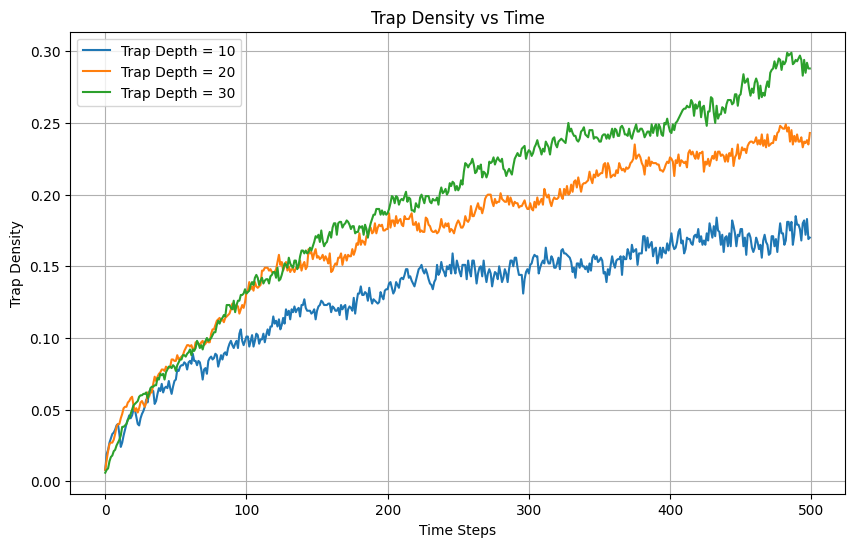

In [26]:
# Trap Density vs Time Plot
plt.figure(figsize=(10, 6))
for depth, trap_density in trap_density_results.items():
    if depth > 0:  # Exclude the no-trap case
        plt.plot(trap_density, label=f"Trap Depth = {depth}")
plt.title("Trap Density vs Time")
plt.xlabel("Time Steps")
plt.ylabel("Trap Density")
plt.legend()
plt.grid(True)
plt.show()

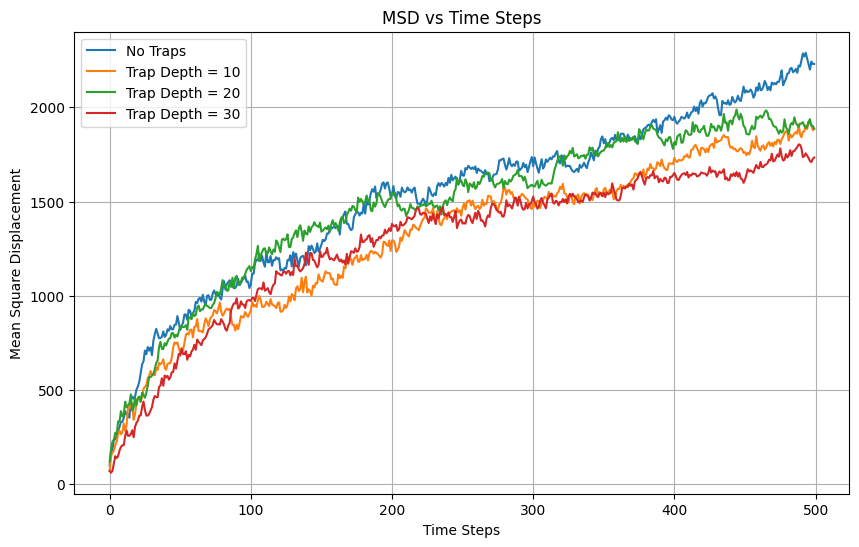

In [27]:
# MSD vs Time Plot
plt.figure(figsize=(10, 6))
for depth, msd in msd_results.items():
    label = f"Trap Depth = {depth}" if depth > 0 else "No Traps"
    plt.plot(msd, label=label)
plt.title("MSD vs Time Steps")
plt.xlabel("Time Steps")
plt.ylabel("Mean Square Displacement")
plt.legend()
plt.grid(True)
plt.show()

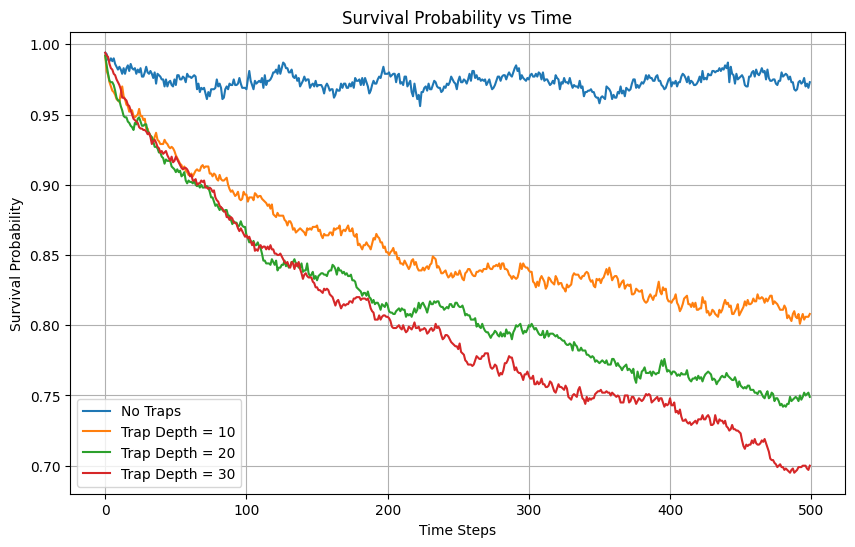

In [28]:
# Survival Probability vs Time Plot
plt.figure(figsize=(10, 6))
for depth, survival_prob in survival_results.items():
    label = f"Trap Depth = {depth}" if depth > 0 else "No Traps"
    plt.plot(survival_prob, label=label)
plt.title("Survival Probability vs Time")
plt.xlabel("Time Steps")
plt.ylabel("Survival Probability")
plt.legend()
plt.grid(True)
plt.show()

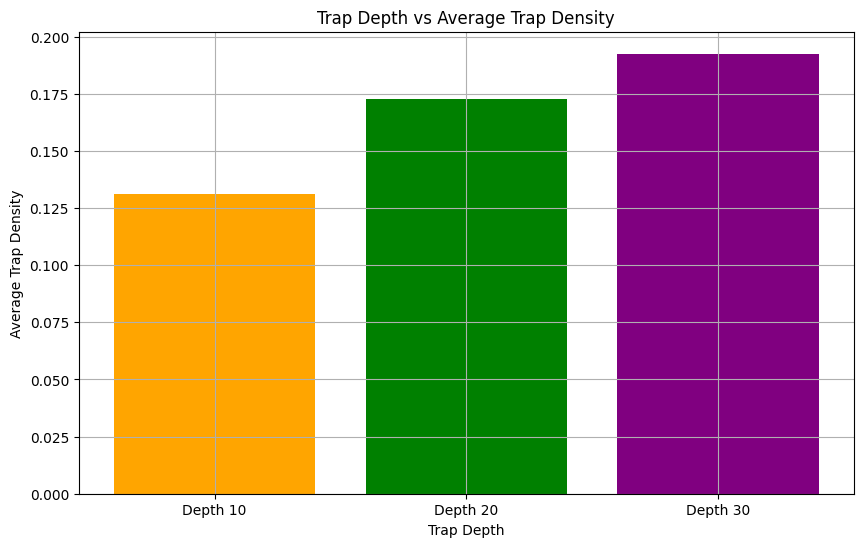

In [29]:
# Trap Depth vs Average Trap Density (Bar Chart)
avg_trap_densities = [np.mean(trap_density_results[depth]) for depth in trap_depths if depth > 0]
plt.figure(figsize=(10, 6))
plt.bar([f"Depth {d}" for d in trap_depths if d > 0], avg_trap_densities, color=['orange', 'green', 'purple'])
plt.title("Trap Depth vs Average Trap Density")
plt.xlabel("Trap Depth")
plt.ylabel("Average Trap Density")
plt.grid(True)
plt.show()

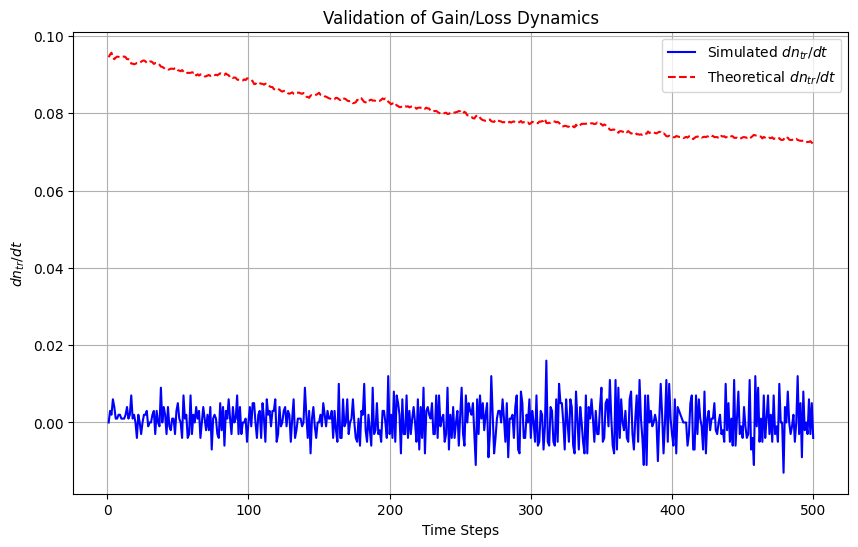

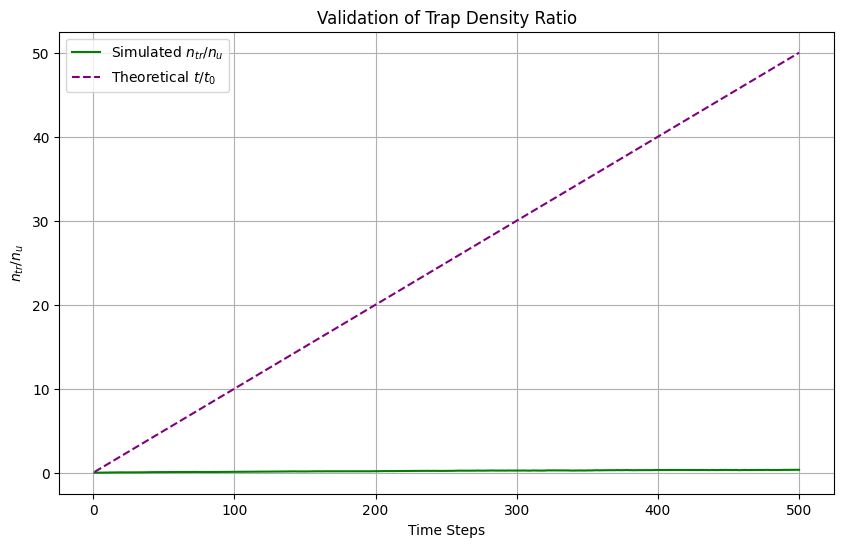

Trap Depth = 10, Effective Diffusivity = 0.0219
Trap Depth = 20, Effective Diffusivity = 0.0429
Trap Depth = 30, Effective Diffusivity = 0.0631


In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 100  # Lattice size
N_particles = 1000  # Number of particles
num_steps = 500  # Number of time steps
trap_size = 3  # Trap radius
delta_t = 1.0  # Time step size
trap_depth = 20  # Moderate trap depth
t_0 = 10  # Characteristic trapping time

# Initialize traps and particles
traps = initialize_traps(L, 10, trap_size)  # Few traps
positions = initialize_particles(N_particles, L, traps, trap_size)

# Initialize arrays
n_tr = np.zeros(num_steps)  # Fraction of trapped particles
n_u = np.zeros(num_steps)  # Fraction of untrapped particles
dn_tr_dt = np.zeros(num_steps)  # Derivative of trapped particle density
time_steps = np.arange(1, num_steps + 1)

# Simulate dynamics
trapping_times = np.zeros(N_particles)

for t in range(num_steps):
    free_particles = 0
    for i in range(N_particles):
        if trapping_times[i] > 0:
            trapping_times[i] -= delta_t
            continue

        move = np.random.choice(['up', 'down', 'left', 'right'])
        if move == 'up':
            positions[i][0] = (positions[i][0] + 1) % L
        elif move == 'down':
            positions[i][0] = (positions[i][0] - 1) % L
        elif move == 'right':
            positions[i][1] = (positions[i][1] + 1) % L
        elif move == 'left':
            positions[i][1] = (positions[i][1] - 1) % L

        if is_in_trap(positions[i], traps, trap_size):
            trapping_times[i] = trap_depth
        else:
            free_particles += 1

    n_tr[t] = np.sum(trapping_times > 0) / N_particles
    n_u[t] = free_particles / N_particles

# Compute derivative of n_tr(t)
dn_tr_dt[1:] = np.diff(n_tr) / delta_t

# Theoretical and simulated dynamics comparison
theoretical_dn_tr_dt = n_u / t_0 - n_tr / time_steps

plt.figure(figsize=(10, 6))
plt.plot(time_steps, dn_tr_dt, label="Simulated $dn_{tr}/dt$", color="blue")
plt.plot(time_steps, theoretical_dn_tr_dt, label="Theoretical $dn_{tr}/dt$", linestyle="--", color="red")
plt.title("Validation of Gain/Loss Dynamics")
plt.xlabel("Time Steps")
plt.ylabel("$dn_{tr}/dt$")
plt.legend()
plt.grid(True)
plt.show()

# Validate trap density ratio
trap_density_ratio = n_tr / n_u
theoretical_ratio = time_steps / t_0

plt.figure(figsize=(10, 6))
plt.plot(time_steps, trap_density_ratio, label="Simulated $n_{tr}/n_u$", color="green")
plt.plot(time_steps, theoretical_ratio, label="Theoretical $t/t_0$", linestyle="--", color="purple")
plt.title("Validation of Trap Density Ratio")
plt.xlabel("Time Steps")
plt.ylabel("$n_{tr}/n_u$")
plt.legend()
plt.grid(True)
plt.show()

# Compute effective diffusivity
msd_no_traps = msd_results[0]  # MSD from no-trap case
D = msd_no_traps[-1] / (4 * num_steps)  # Free diffusion coefficient

effective_diffusivity = {}
for depth in trap_depths[1:]:  # Skip no-trap case
    lambda_trap = num_steps / depth
    D_eff = D / (lambda_trap + 1)
    effective_diffusivity[depth] = D_eff

# Display effective diffusivity results
for depth, D_eff in effective_diffusivity.items():
    print(f"Trap Depth = {depth}, Effective Diffusivity = {D_eff:.4f}")


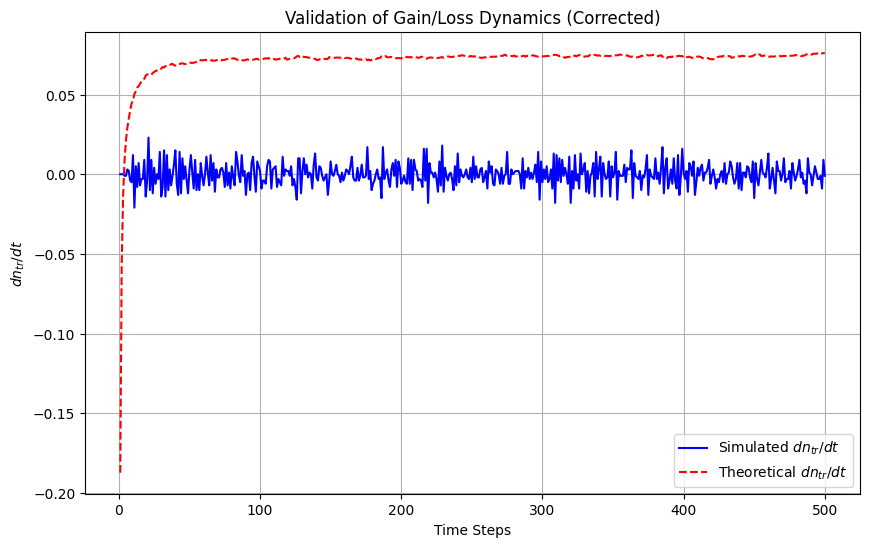

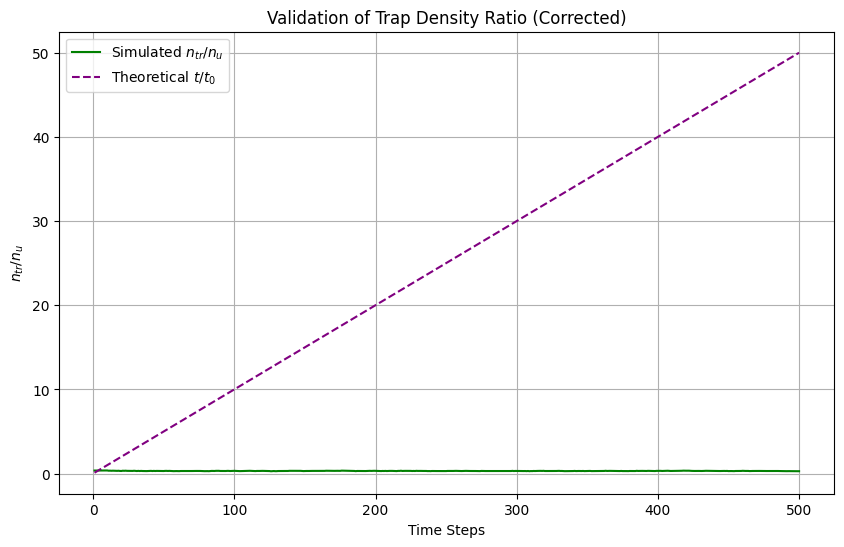

In [31]:
# Parameters
t_0 = 10  # Characteristic trapping time
trap_depth = t_0  # Trapping depth matches t_0 for simplicity

# Reinitialize arrays for improved accuracy
n_tr = np.zeros(num_steps)
n_u = np.zeros(num_steps)
dn_tr_dt = np.zeros(num_steps)

# Simulate dynamics with corrected trapping
for t in range(num_steps):
    free_particles = 0
    for i in range(N_particles):
        if trapping_times[i] > 0:
            trapping_times[i] -= delta_t
            continue

        move = np.random.choice(['up', 'down', 'left', 'right'])
        if move == 'up':
            positions[i][0] = (positions[i][0] + 1) % L
        elif move == 'down':
            positions[i][0] = (positions[i][0] - 1) % L
        elif move == 'right':
            positions[i][1] = (positions[i][1] + 1) % L
        elif move == 'left':
            positions[i][1] = (positions[i][1] - 1) % L

        if is_in_trap(positions[i], traps, trap_size):
            trapping_times[i] = trap_depth
        else:
            free_particles += 1

    n_tr[t] = np.sum(trapping_times > 0) / N_particles
    n_u[t] = free_particles / N_particles

# Compute smoothed derivative of n_tr(t)
dn_tr_dt[1:] = np.diff(n_tr) / delta_t

# Improved validation of gain/loss dynamics
theoretical_dn_tr_dt = n_u / t_0 - n_tr / time_steps

plt.figure(figsize=(10, 6))
plt.plot(time_steps, dn_tr_dt, label="Simulated $dn_{tr}/dt$", color="blue")
plt.plot(time_steps, theoretical_dn_tr_dt, label="Theoretical $dn_{tr}/dt$", linestyle="--", color="red")
plt.title("Validation of Gain/Loss Dynamics (Corrected)")
plt.xlabel("Time Steps")
plt.ylabel("$dn_{tr}/dt$")
plt.legend()
plt.grid(True)
plt.show()

# Validate trap density ratio
trap_density_ratio = n_tr / n_u
theoretical_ratio = time_steps / t_0

plt.figure(figsize=(10, 6))
plt.plot(time_steps, trap_density_ratio, label="Simulated $n_{tr}/n_u$", color="green")
plt.plot(time_steps, theoretical_ratio, label="Theoretical $t/t_0$", linestyle="--", color="purple")
plt.title("Validation of Trap Density Ratio (Corrected)")
plt.xlabel("Time Steps")
plt.ylabel("$n_{tr}/n_u$")
plt.legend()
plt.grid(True)
plt.show()
